<a href="https://colab.research.google.com/github/chinmayj23/ML/blob/master/lab7_J079_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COv type dataset

 

In [ ]:
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype

In [ ]:
from sklearn.datasets import fetch_covtype
forest = fetch_covtype()
y_fetch_covtype = forest.target
x_fetch_covtype = forest.data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X=pd.DataFrame(x_fetch_covtype)
Y=y_fetch_covtype
Y1=pd.DataFrame(Y.copy())
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y1.columns=["Outcome"]

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [ ]:
data = pd.concat([X,Y1], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Outcome
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


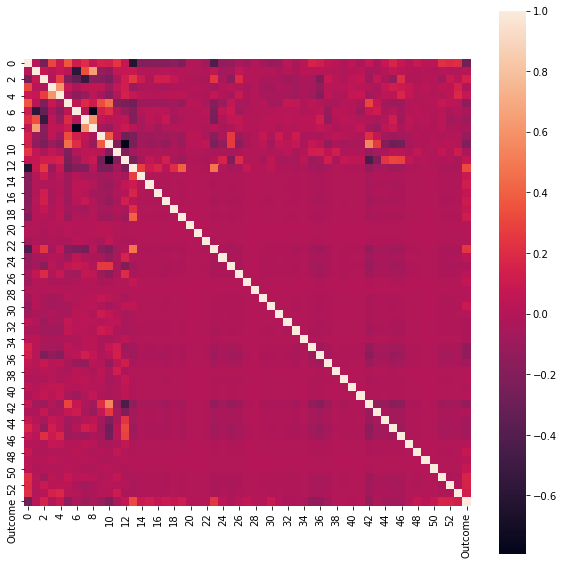

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    square=True
)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(data)

In [ ]:
df=pd.DataFrame(X_stand)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,4.287867,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.036857
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,-0.497429,4.272931,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,-0.036857
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,1.10808,-0.232859,-0.879364,-0.260673,-0.072416,-0.114549,-0.091491,-0.147649,-0.0525,-0.106986,-0.013444,-0.017555,-0.044475,-0.243947,-0.147734,-0.233216,-0.175866,-0.032125,-0.002272,-0.070148,-0.076972,-0.057264,-0.08348,-0.127256,-0.038005,-0.24686,-0.332219,-0.194973,-0.028574,-0.066903,-0.043274,-0.040384,2.010336,-0.234031,-0.21498,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.111366


In [ ]:
Y = pd.get_dummies(Y1['Outcome'])
Y

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
581007,0,0,1,0,0,0,0
581008,0,0,1,0,0,0,0
581009,0,0,1,0,0,0,0
581010,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [ ]:
from keras import models
from keras import layers

In [ ]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('Y_test: ',y_test.shape)

X_train:  (464809, 55)
y_train:  (464809, 7)
X_test:  (116203, 55)
Y_test:  (116203, 7)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(128, activation= 'relu', input_dim= (55))) 
nn.add(layers.Dense(56, activation= 'relu'))
nn.add(layers.Dense(7, activation= 'softmax'))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 56)                7224      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 399       
Total params: 14,791
Trainable params: 14,791
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer= 'adam', loss= ['categorical_crossentropy'], metrics= 'accuracy')

In [ ]:
hist = nn.fit(X_train,y_train, epochs= 10, validation_split= 0.25)

Epoch 1/10
10894/10894 [==============================] - 16s 1ms/step - loss: 0.0254 - accuracy: 0.9929 - val_loss: 3.7783e-04 - val_accuracy: 0.9999
Epoch 2/10
10894/10894 [==============================] - 16s 1ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0075 - val_accuracy: 0.9979
Epoch 3/10
10894/10894 [==============================] - 16s 1ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 4.1475e-05 - val_accuracy: 1.0000
Epoch 4/10
10894/10894 [==============================] - 16s 1ms/step - loss: 9.4190e-04 - accuracy: 0.9998 - val_loss: 3.8969e-04 - val_accuracy: 0.9999
Epoch 5/10
10894/10894 [==============================] - 16s 1ms/step - loss: 5.7326e-04 - accuracy: 0.9999 - val_loss: 2.4915e-04 - val_accuracy: 1.0000
Epoch 6/10
10894/10894 [==============================] - 16s 1ms/step - loss: 5.7376e-04 - accuracy: 0.9999 - val_loss: 7.3597e-05 - val_accuracy: 1.0000
Epoch 7/10
10894/10894 [==============================] - 16s 1ms/step - loss: 7.6010e

In [ ]:
nn.evaluate(X_test,y_test)

3632/3632 [==============================] - 3s 871us/step - loss: 0.0034 - accuracy: 0.9995


[0.003413921222090721, 0.9994836449623108]

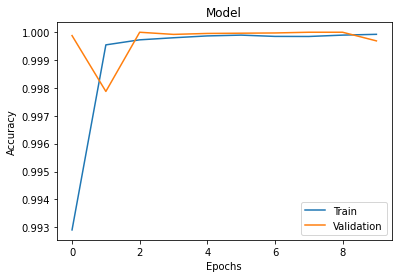

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Validation'], loc="lower right")
plt.show()


Breast cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
#Dataset Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
cancer = load_breast_cancer()
x_bc = cancer.data
y_bc = cancer.target

In [ ]:
X=pd.DataFrame(x_bc)
Y=pd.DataFrame(y_bc)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Y.columns=["Outcome"]

In [ ]:
Y['Outcome'].nunique()

2

In [ ]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=8)

In [ ]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',y_test.shape)

X_train shape:  (455, 30)
Y_train shape:  (455, 1)
X_test shape:  (114, 30)
Y_test shape:  (114, 1)


In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
Y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [ ]:
y_test.shape

(114, 2)

In [ ]:
nn1= models.Sequential()

nn1.add(layers.Dense(1024, activation= 'relu', input_dim= (30)))
nn1.add(layers.Dense(512, activation= 'tanh'))
nn1.add(layers.Dense(256, activation= 'relu'))
nn1.add(layers.Dense(2, activation= 'sigmoid'))

nn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              31744     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 688,386
Trainable params: 688,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= 'accuracy')

In [ ]:
hist1= nn1.fit(X_train,Y_train, epochs= 50, validation_split= 0.25)

Epoch 1/50
11/11 [==============================] - 0s 22ms/step - loss: 0.2012 - accuracy: 0.9062 - val_loss: 0.1241 - val_accuracy: 0.9649
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0645 - accuracy: 0.9795 - val_loss: 0.1257 - val_accuracy: 0.9649
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0455 - accuracy: 0.9912 - val_loss: 0.1194 - val_accuracy: 0.9649
Epoch 4/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0298 - accuracy: 0.9853 - val_loss: 0.1378 - val_accuracy: 0.9649
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0258 - accuracy: 0.9883 - val_loss: 0.1245 - val_accuracy: 0.9649
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.1228 - val_accuracy: 0.9649
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1338 - val_accuracy: 0.9649
Epoch 8/50
11

In [ ]:
nn1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9825


[0.1549985557794571, 0.9824561476707458]

In [ ]:
nn1.evaluate(X_train,Y_train)

15/15 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9912


[0.06896568089723587, 0.9912087917327881]

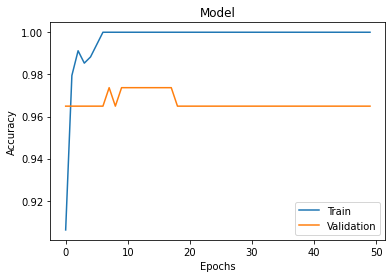

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title("Model")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Validation'], loc="lower right")
plt.show()

kddcup99()


In [ ]:
from sklearn import datasets
kc= datasets.fetch_kddcup99()

In [ ]:
kc

{'DESCR': ".. _kddcup99_dataset:\n\nKddcup 99 dataset\n-----------------\n\nThe KDD Cup '99 dataset was created by processing the tcpdump portions\nof the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,\ncreated by MIT Lincoln Lab [1]. The artificial data (described on the `dataset's\nhomepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was\ngenerated using a closed network and hand-injected attacks to produce a\nlarge number of different types of attack with normal activity in the\nbackground. As the initial goal was to produce a large training set for\nsupervised learning algorithms, there is a large proportion (80.1%) of\nabnormal data which is unrealistic in real world, and inappropriate for\nunsupervised anomaly detection which aims at detecting 'abnormal' data, ie\n\n1) qualitatively different from normal data\n\n2) in large minority among the observations.\n\nWe thus transform the KDD Data set into two different data sets: SA and SF.\n\n-SA is o

In [ ]:
kc['DESCR']

".. _kddcup99_dataset:\n\nKddcup 99 dataset\n-----------------\n\nThe KDD Cup '99 dataset was created by processing the tcpdump portions\nof the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,\ncreated by MIT Lincoln Lab [1]. The artificial data (described on the `dataset's\nhomepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was\ngenerated using a closed network and hand-injected attacks to produce a\nlarge number of different types of attack with normal activity in the\nbackground. As the initial goal was to produce a large training set for\nsupervised learning algorithms, there is a large proportion (80.1%) of\nabnormal data which is unrealistic in real world, and inappropriate for\nunsupervised anomaly detection which aims at detecting 'abnormal' data, ie\n\n1) qualitatively different from normal data\n\n2) in large minority among the observations.\n\nWe thus transform the KDD Data set into two different data sets: SA and SF.\n\n-SA is obtained by

In [ ]:
kc['target']

array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
       b'normal.'], dtype=object)

In [ ]:
df= pd.DataFrame(data= kc['data']) 

In [ ]:
y3= pd.DataFrame(kc['target'])

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc=StandardScaler()
le=LabelEncoder()

In [ ]:
df.shape

(494021, 41)

In [ ]:
for i in range(1,4):
  df[i]=le.fit_transform(df[i])
for j in range (6,22):
  df[j]=le.fit_transform(df[j])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       494021 non-null  object
 1   1       494021 non-null  int64 
 2   2       494021 non-null  int64 
 3   3       494021 non-null  int64 
 4   4       494021 non-null  object
 5   5       494021 non-null  object
 6   6       494021 non-null  int64 
 7   7       494021 non-null  int64 
 8   8       494021 non-null  int64 
 9   9       494021 non-null  int64 
 10  10      494021 non-null  int64 
 11  11      494021 non-null  int64 
 12  12      494021 non-null  int64 
 13  13      494021 non-null  int64 
 14  14      494021 non-null  int64 
 15  15      494021 non-null  int64 
 16  16      494021 non-null  int64 
 17  17      494021 non-null  int64 
 18  18      494021 non-null  int64 
 19  19      494021 non-null  int64 
 20  20      494021 non-null  int64 
 21  21      494021 non-null  int64 
 

In [ ]:
y3=pd.get_dummies(y3)

In [ ]:
y3.shape

(494021, 23)

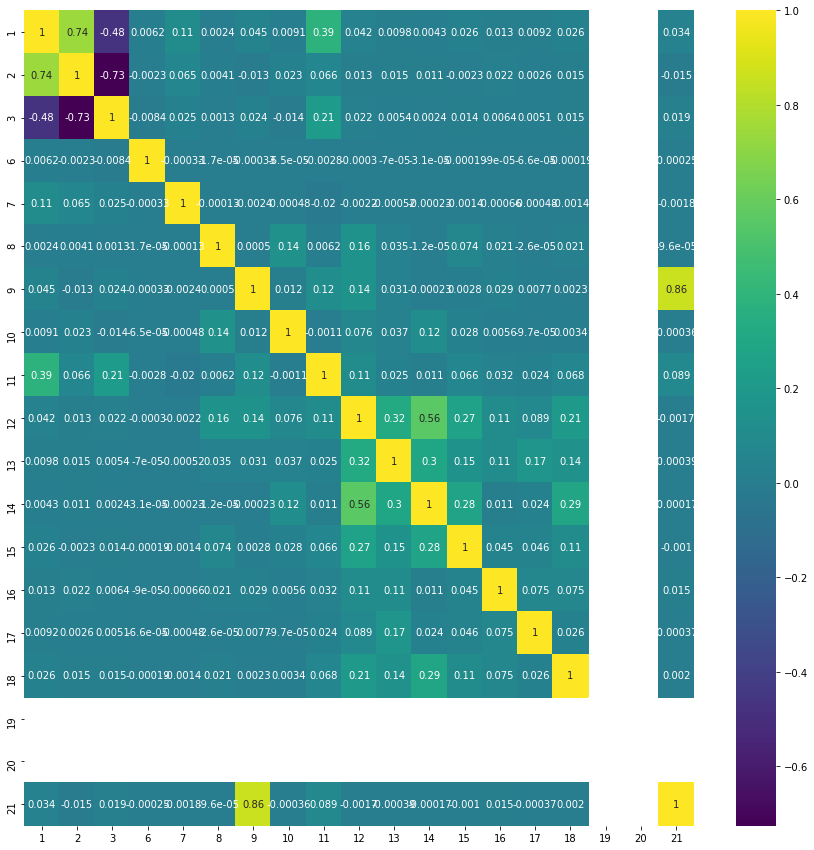

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cor=df.corr()
fig=plt.subplots(figsize=[15,15])
ax=sns.heatmap(data= cor, fmt= '.2g', cmap= 'viridis', annot= True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtr,xte,ytr,yte=train_test_split(df,y3,test_size=0.2)

In [ ]:
print('X_train shape',xtr.shape)
print('y_train shape',ytr.shape)
print('X_test shape',xte.shape)
print('y_test shape',yte.shape)

X_train shape (395216, 41)
y_train shape (395216, 23)
X_test shape (98805, 41)
y_test shape (98805, 23)


In [ ]:
xtr=np.array(xtr).astype(np.float32)
xte=np.array(xte).astype(np.float32)
ytr=np.array(ytr).astype(np.float32)
yte=np.array(yte).astype(np.float32)

In [ ]:
X_train.dtype
X_test=np.array(X_test).astype(np.float32)
y_train=np.array(y_train).astype(np.float32)
y_test=np.array(y_test).astype(np.float32)v

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
nn2=models.Sequential()

nn2.add(layers.Dense(100,activation='relu',input_dim=(41)))
nn2.add(layers.Dense(50,activation='relu'))
nn2.add(layers.Dense(23,activation='softmax'))

In [ ]:
nn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 23)                1173      
Total params: 10,423
Trainable params: 10,423
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn2.compile(optimizer='adam',loss=['categorical_crossentropy'],metrics='accuracy')

In [ ]:
hist2=nn2.fit(xtr,ytr,batch_size=28,epochs=50,validation_split=0.25)

Epoch 1/50
10587/10587 [==============================] - 16s 2ms/step - loss: 76.1196 - accuracy: 0.9791 - val_loss: 165.2963 - val_accuracy: 0.9849
Epoch 2/50
10587/10587 [==============================] - 16s 2ms/step - loss: 98.5407 - accuracy: 0.9889 - val_loss: 33.6436 - val_accuracy: 0.9934
Epoch 3/50
10587/10587 [==============================] - 16s 2ms/step - loss: 67.9390 - accuracy: 0.9916 - val_loss: 50.5869 - val_accuracy: 0.9956
Epoch 4/50
10587/10587 [==============================] - 18s 2ms/step - loss: 26.8663 - accuracy: 0.9930 - val_loss: 48.4940 - val_accuracy: 0.9955
Epoch 5/50
10587/10587 [==============================] - 16s 2ms/step - loss: 25.9804 - accuracy: 0.9941 - val_loss: 32.3830 - val_accuracy: 0.9939
Epoch 6/50
10587/10587 [==============================] - 16s 2ms/step - loss: 18.7758 - accuracy: 0.9944 - val_loss: 20.4787 - val_accuracy: 0.9965
Epoch 7/50
10587/10587 [==============================] - 16s 2ms/step - loss: 15.4875 - accuracy: 0.9950

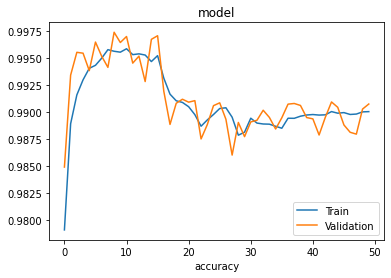

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title("model")
plt.xlabel("epochs")
plt.xlabel("accuracy")
plt.legend(['Train','Validation'],loc="lower right")
plt.show()

Not working
hist2=nn2.fit(xtr,ytr,batch_size=28,epochs=50,validation_split=0.25)

Wine dataset

In [ ]:
wine= datasets.load_wine()

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
x_wine=wine.data

In [ ]:
y_wine=wine.target